In [19]:

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

def single_particle_T(L, v, w, open_bc=True):
    """Return the LxL tridiagonal hopping matrix T for the dimerized XY chain.
    Intracell bonds (odd-even):      -v/2
    Intercell bonds (even-odd next): -w/2
    open_bc=True -> open chain; False -> periodic (adds wrap bond).
    """
    main = np.zeros(L, dtype=float)
    off = np.zeros(L-1, dtype=float)
    for j in range(L-1):
        if j % 2 == 0:
            off[j] = -v/2.0
        else:
            off[j] = -w/2.0
    T = diags([main, off, off], [0, -1, 1], format='csr')

    if not open_bc and L > 2:
        wrap = - (v/2.0 if (L-1) % 2 == 0 else w/2.0)
        T = T.tolil()
        T[0, L-1] = wrap
        T[L-1, 0] = wrap
        T = T.tocsr()
    return T

def lanczos_spectrum(L, v, w, k=12, open_bc=True):
    """Compute k extremal eigenvalues of T via Lanczos (eigsh)."""
    T = single_particle_T(L, v, w, open_bc=open_bc)
    # k_use = min(k, max(L-2, 1))
    # vals = eigsh(T, k=k_use, which='SA', return_eigenvectors=False)
    vals = np.linalg.eigvalsh(T.toarray())
    return np.sort(vals)

# chain length (number of sites = 2 × number of SSH unit cells)
L = 30
v = 0.8
w = 1.2

# k lowest single-particle energies via Lanczos (open boundaries)
evals = lanczos_spectrum(L, v, w, k=30, open_bc=True)


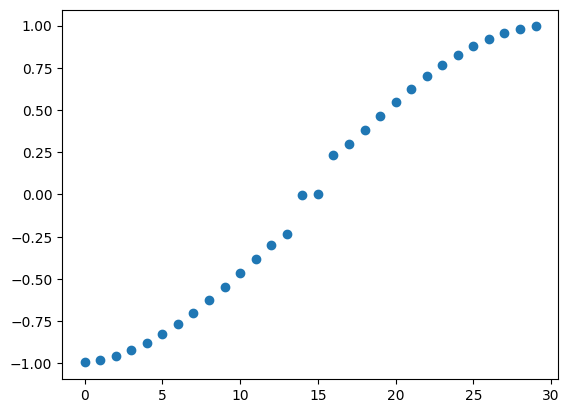

In [20]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(L), evals)